# Understanding the problem

Lets understand the problem first-:
The main goal of this project is to predict user churn for an e-commerce platform in simple terms.

Now what is churn?
Churn refers to users who stop engaging with the platform. For an e-commerce platform, this could mean users who stop visiting the site, adding items to their cart, or making purchases after a certain period of time. Example-: Riya used to love purchasing from this platform now from last 2 months she has not purchased anything so what all things we can do to re-engage her on this platform through offers or discounts. So, main goal is to predict past behaviour and get the required insights for retention of prev customers . 

# Understanding what research paper has to say in context for this project.

The research paper, titled "In Pursuit of Enhanced Customer Retention Management," highlights the following key points:

The Problem:

Customer retention is critical for businesses, but managing it effectively remains a challenge. Many firms struggle to retain customers despite recognizing its importance.
Current research mainly focuses on predicting churn (identifying customers likely to leave), but neglects other essential aspects of retention management, such as:
--> Whom to target with retention campaigns.
--> When to intervene.
--> What incentives or strategies to use.

The Opportunity:

The paper advocates for a broader approach to customer retention, extending beyond the simple "retain/not retain" view.
It suggests using new data sources and machine learning techniques to better manage retention.

Key Takeaways from the Abstract
--> Importance of Retention: Customer retention is vital for business 

--> Broader Perspective Needed: Retention management should go beyond just predicting churn and take a holistic, data-driven approach.

--> Emerging Tools: New methodologies, including machine learning, to make new strategies.

--> Focus on Integration: Retention efforts should align with the company’s marketing strategy and consider long-term impact rather than isolated campaigns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("events.csv")

In [5]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [6]:
df.shape

(885129, 9)

# Data Inspection & Preprocessing

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
None


In [8]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [9]:
#lets check for missing values.
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

In [10]:
# Fill missing category_code and brand with their respective mode values (most frequent value)
df['category_code'].fillna(df['category_code'].mode()[0], inplace=True)
df['brand'].fillna(df['brand'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

event_time         0
event_type         0
product_id         0
category_id        0
category_code      0
brand              0
price              0
user_id            0
user_session     165
dtype: int64

In [12]:
df.dropna(subset=['user_session'], inplace=True)

In [13]:
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [14]:
#looks like most of the datetime data is in utc but lets include all format and convert them to datetime format.
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S UTC')

In [15]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,asus,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27,view,215454,2144415927158964449,computers.components.videocards,asus,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,computers.components.videocards,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
5,2020-09-24 11:57:59,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW
6,2020-09-24 11:58:23,view,3791349,2144415935086199225,computers.desktop,asus,215.41,1515915625519388877,J1t6sIYXiV
7,2020-09-24 11:58:24,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw
8,2020-09-24 11:58:25,view,657859,2144415939431498289,computers.components.videocards,asus,34.17,1515915625519320570,HEl15U7JVy
9,2020-09-24 11:58:31,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39


In [16]:
print(df.dtypes)

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object


# Understanding user activity

In [17]:
# Group the data by user_id and aggregate user activity
user_activity = df.groupby('user_id').agg(
    total_events=('event_type', 'count'),
    unique_sessions=('user_session', 'nunique'),
    first_event=('event_time', 'min'),
    last_event=('event_time', 'max'),
    total_spent=('price', 'sum')
).reset_index()


Inactive Days: Helps identify users who have not engaged recently, which is valuable for retention strategies.
Insights:
Users with high inactivity might be at risk of churn.
You can target such users with re-engagement campaigns.

In [21]:
current_date = df['event_time'].max() #current date

In [22]:
user_activity['inactive_days'] = (current_date - user_activity['last_event']).dt.days

In [23]:
user_activity.head()

,user_id,total_events,unique_sessions,first_event,last_event,total_spent,inactive_days
0,1515915625353226922,1,1,2020-10-29 11:28:35,2020-10-29 11:28:35,76.48,122
1,1515915625353230067,1,1,2020-10-06 06:30:32,2020-10-06 06:30:32,28.98,145
2,1515915625353230683,13,4,2020-11-09 08:52:51,2020-12-12 10:33:09,814.93,78
3,1515915625353230922,1,1,2020-10-02 08:23:40,2020-10-02 08:23:40,274.40,149
4,1515915625353234047,36,1,2020-09-29 16:01:54,2021-02-18 09:11:44,5481.90,10


In [24]:
#creating function to categorize the user activity.
def categorize_user_activity(days):
    if days<30:
        return "Active"
    elif 30 <days<=90:
        return "At Risk"
    else:
        return "Churned"
    

In [25]:
user_activity['status'] = user_activity['inactive_days'].apply(categorize_user_activity)

In [26]:
user_activity.head()

,user_id,total_events,unique_sessions,first_event,last_event,total_spent,inactive_days,status
0,1515915625353226922,1,1,2020-10-29 11:28:35,2020-10-29 11:28:35,76.48,122,Churned
1,1515915625353230067,1,1,2020-10-06 06:30:32,2020-10-06 06:30:32,28.98,145,Churned
2,1515915625353230683,13,4,2020-11-09 08:52:51,2020-12-12 10:33:09,814.93,78,At Risk
3,1515915625353230922,1,1,2020-10-02 08:23:40,2020-10-02 08:23:40,274.40,149,Churned
4,1515915625353234047,36,1,2020-09-29 16:01:54,2021-02-18 09:11:44,5481.90,10,Active


# Threshold-Based Definition (e.g., No Purchase in Last 30 Days)


This is a time-based approach where a user is considered churned if they haven't made a purchase or engaged with the platform  in a specified time frame.

Definition:
Churned User: A user who has not made a purchase or performed any meaningful activity (e.g., cart additions or views) within the last 30 days.
Justification:
User Engagement Cycle: E-commerce platforms generally expect regular engagement from their users, and for many businesses, a 30-day window is considered a reasonable time frame to expect some level of purchase or activity. After this period, users who do not engage are likely to have stopped using the platform for an extended time.
Business Relevance: A 30-day period is often aligned with promotional cycles, loyalty programs, or marketing strategies where engagement is expected within a month. If a user hasn't returned in this period, they could be considered at risk of churn or already churned.
Industry Standard: Many businesses, including subscription-based services and retail, define churn in terms of non-engagement over 30 days. For example, SaaS platforms often use 30-day periods to track user activity.

We chose a **time-based definition** for churn (e.g., no purchase in 30 days) because it's simple, actionable, and aligns with industry standards. It provides consistent segmentation while allowing businesses to trigger timely re-engagement efforts. To handle **edge cases** like irregular shoppers, new users, or seasonal buyers, we customize thresholds based on historical patterns, engagement metrics, or seasonality, ensuring accuracy and relevance across diverse user types. This approach balances interpretability and adaptability, making it practical for real-world applications.

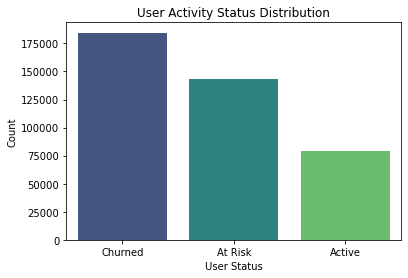

In [27]:
#lets plot for visualization
sns.countplot(data=user_activity, x='status', palette='viridis')
plt.title('User Activity Status Distribution')
plt.xlabel('User Status')
plt.ylabel('Count')
plt.show()

In [28]:
user_activity['status'].value_counts()

status
Churned    184522
At Risk    143245
Active      79470
Name: count, dtype: int64

In [29]:
# Extract date from event_time
df['event_date'] = df['event_time'].dt.date

In [30]:
df['event_date']

0         2020-09-24
1         2020-09-24
2         2020-09-24
3         2020-09-24
4         2020-09-24
             ...    
885124    2021-02-28
885125    2021-02-28
885126    2021-02-28
885127    2021-02-28
885128    2021-02-28
Name: event_date, Length: 884964, dtype: object

In [31]:
# Group by event_date and event_type
event_distributions = df.groupby(['event_date', 'event_type']).size().unstack(fill_value=0)

In [32]:
event_distributions

event_type,cart,purchase,view
event_date,,,
2020-09-24,99,84,2081
2020-09-25,240,149,3852
2020-09-26,177,119,3167
2020-09-27,172,110,3568
2020-09-28,259,200,4255
...,...,...,...
2021-02-24,413,292,5098
2021-02-25,411,248,4988
2021-02-26,416,275,5173


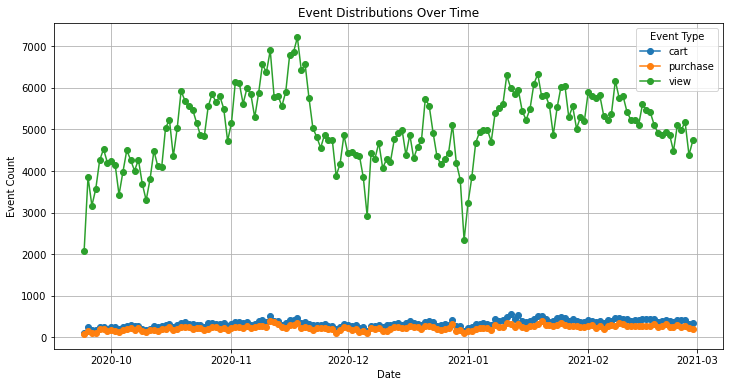

In [33]:
event_distributions.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Event Distributions Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.legend(title='Event Type')
plt.grid()
plt.show()

## Brand and Category Popularity

In [34]:
# Popularity by brand
brand_popularity = df['brand'].value_counts().head(10)
print("Top 10 Popular Brands:")
print(brand_popularity)

Top 10 Popular Brands:
brand
asus         240029
gigabyte      27673
msi           24876
palit         24801
samsung       23198
amd           20107
canon         18437
panasonic     11986
pioneer       11467
sirius        11404
Name: count, dtype: int64


In [35]:
# Popularity by category
category_popularity = df['category_code'].value_counts().head(10)
print("\nTop 10 Popular Categories:")
print(category_popularity)



Top 10 Popular Categories:
category_code
computers.components.videocards     352884
electronics.telephone                84343
computers.peripherals.printer        43219
stationery.cartrige                  38719
electronics.audio.acoustic           26764
computers.components.motherboard     26600
computers.notebook                   25025
computers.components.cpu             24768
electronics.video.tv                 21391
electronics.tablet                   19376
Name: count, dtype: int64


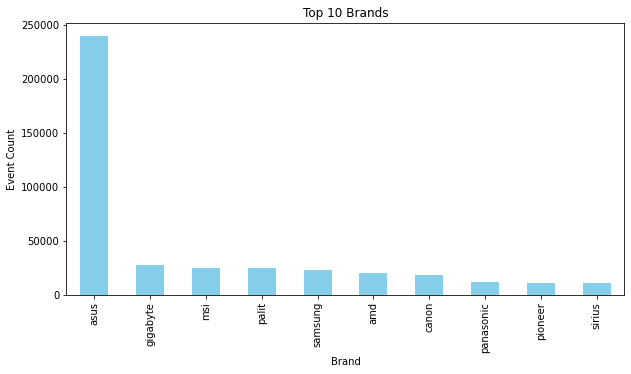

In [36]:
# Visualize
brand_popularity.plot(kind='bar', figsize=(10, 5), color='skyblue', title='Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Event Count')
plt.show()

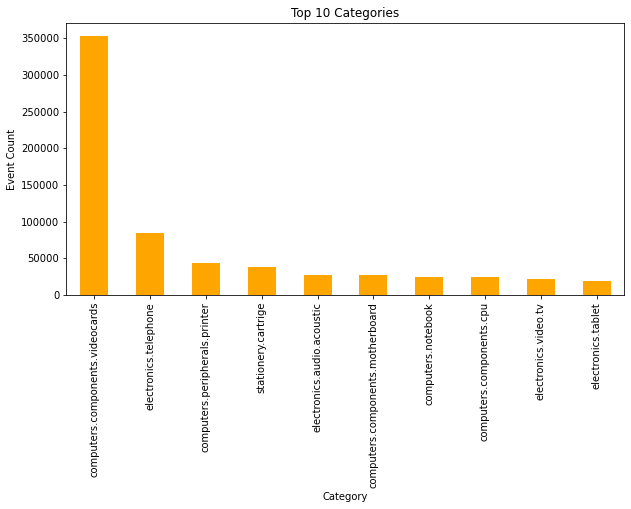

In [37]:
category_popularity.plot(kind='bar', figsize=(10, 5), color='orange', title='Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Event Count')
plt.show()

In [38]:
# Total spend per user
total_spend = user_activity[['user_id', 'total_spent']].sort_values(by='total_spent', ascending=False)
print("Top Spenders:")
print(total_spend.head(10))

Top Spenders:
                    user_id  total_spent
249932  1515915625568273951    209144.53
296169  1515915625593056776    191944.85
210000  1515915625554995474    179380.04
283955  1515915625591251010    178982.15
175966  1515915625542603891    144095.90
64158   1515915625527763086    133032.08
275874  1515915625573582886     87431.76
319279  1515915625596222123     79884.90
322802  1515915625596734979     73515.60
276949  1515915625573753643     69726.33


In [39]:
# Frequency of visits (unique sessions per user)
frequency_of_visits = user_activity[['user_id', 'unique_sessions']].sort_values(by='unique_sessions', ascending=False)
print("\nMost Frequent Visitors:")
print(frequency_of_visits.head(10))


Most Frequent Visitors:
                    user_id  unique_sessions
135035  1515915625537803839              254
249932  1515915625568273951              244
322802  1515915625596734979              190
76728   1515915625529330827              166
107512  1515915625533483156              147
5606    1515915625513599785              143
5415    1515915625512176731              131
153271  1515915625539946579               96
378113  1515915625605960935               95
207548  1515915625551553663               84


In [40]:
# Sort by user_id and event_time 
df = df.sort_values(by=['user_id', 'event_time'])

# Calculate the previous event time for each user
df['prev_event_time'] = df.groupby('user_id')['event_time'].shift(1)


In [41]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,prev_event_time
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.48,1515915625353226922,7qejzWzHlR,2020-10-29,NaT
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,computers.components.videocards,kester,28.98,1515915625353230067,ikPKHkuRhA,2020-10-06,NaT
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.90,1515915625353230683,dn9FkZ11dA,2020-11-09,NaT
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.73,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 08:52:51
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.90,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:04:34
242344,2020-11-09 09:10:59,view,461533,2144415924424278172,electronics.audio.acoustic,smartbuy,12.94,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:08:53
242379,2020-11-09 09:15:27,view,1399881,2144415924424278172,electronics.audio.acoustic,sven,28.52,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:10:59
242419,2020-11-09 09:22:00,view,1038457,2144415924424278172,electronics.audio.acoustic,bbk,16.84,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:15:27
242442,2020-11-09 09:25:34,view,886608,2144415924424278172,electronics.audio.acoustic,perfeo,13.32,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:22:00
242447,2020-11-09 09:26:38,view,3793158,2144415924424278172,electronics.audio.acoustic,canyon,10.03,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:25:34


In [42]:
# Calculate the time difference between consecutive events (in days)
df['time_between_visits'] = (df['event_time'] - df['prev_event_time']).dt.total_seconds() / (60 * 60 * 24)  # Convert to days

In [43]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,prev_event_time,time_between_visits
174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.48,1515915625353226922,7qejzWzHlR,2020-10-29,NaT,NaN
51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,computers.components.videocards,kester,28.98,1515915625353230067,ikPKHkuRhA,2020-10-06,NaT,NaN
242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.90,1515915625353230683,dn9FkZ11dA,2020-11-09,NaT,NaN
242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.73,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 08:52:51,0.008137
242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.90,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:04:34,0.002998
242344,2020-11-09 09:10:59,view,461533,2144415924424278172,electronics.audio.acoustic,smartbuy,12.94,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:08:53,0.001458
242379,2020-11-09 09:15:27,view,1399881,2144415924424278172,electronics.audio.acoustic,sven,28.52,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:10:59,0.003102
242419,2020-11-09 09:22:00,view,1038457,2144415924424278172,electronics.audio.acoustic,bbk,16.84,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:15:27,0.004549
242442,2020-11-09 09:25:34,view,886608,2144415924424278172,electronics.audio.acoustic,perfeo,13.32,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:22:00,0.002477
242447,2020-11-09 09:26:38,view,3793158,2144415924424278172,electronics.audio.acoustic,canyon,10.03,1515915625353230683,dn9FkZ11dA,2020-11-09,2020-11-09 09:25:34,0.000741


# Time-Based Definition
This definition looks at all activities (purchase, browsing, carting) and considers users who haven't interacted in any way over a time period as churned.

Definition:
Churned User: A user who has not interacted with the platform (either by making a purchase, viewing items, or adding to cart) within the last 30 days.
Justification:
Broader Engagement Indicator: This method is useful because it doesn't focus solely on purchases, which may miss users who stop engaging with the platform even though they aren't technically "churned" by the purchase definition.
Behavioral Relevance: Some users may continue browsing, adding items to their cart, or engaging with other features without making a purchase, indicating that they are still interested but haven't made a final decision to buy. A 30-day time-based churn definition helps capture such users.
Consistency: It provides a broader measure of engagement, as a user who stops browsing or visiting the site may be more indicative of churn than one who occasionally adds products to their cart but never completes a purchase.

Both approaches are valuable, but time-based churn definition is often preferable because it captures users who have completely stopped interacting with the platform. This approach considers both active and passive users and helps businesses identify engagement loss earlier, allowing for timely intervention.

If your business is more focused on actual transactions and sees users primarily engaging for purchases, then the threshold-based approach might be more useful. However, if your business cares about broader engagement, the time-based approach is more comprehensive and aligned with long-term customer retention strategies.

In [44]:
churn_threshold_days = 30

In [45]:
# Identify all user events
user_activity = df.groupby('user_id').agg(
    last_activity=('event_time', 'max')
).reset_index()

# Calculate inactivity period
user_activity['inactive_days'] = (current_date - user_activity['last_activity']).dt.days

# Mark users as churned if they haven't interacted in the last 30 days
user_activity['is_churned'] = user_activity['inactive_days'] > churn_threshold_days


In [46]:
user_activity.head(15)

,user_id,last_activity,inactive_days,is_churned
0,1515915625353226922,2020-10-29 11:28:35,122,True
1,1515915625353230067,2020-10-06 06:30:32,145,True
2,1515915625353230683,2020-12-12 10:33:09,78,True
3,1515915625353230922,2020-10-02 08:23:40,149,True
4,1515915625353234047,2021-02-18 09:11:44,10,False
5,1515915625353236157,2021-02-11 16:10:01,17,False
6,1515915625353238403,2020-10-16 09:49:22,135,True
7,1515915625353262977,2020-09-25 06:13:21,156,True
8,1515915625353271890,2020-10-05 09:38:13,146,True
9,1515915625353286099,2020-10-23 14:40:01,128,True


# Feature Engineering

**1. RFM Metrics**
Features Created:

Recency: Days since the user’s last purchase.
Frequency: Number of sessions/events per user.
Monetary: Total spending per user.
Logic:

Recency highlights how recently a user engaged, with higher values indicating potential disengagement.
Frequency shows user engagement over time. Low frequency indicates low interest or activity.
Monetary value helps identify high-value users who are disengaging.
Example:

Example-: A user with high monetary value but long recency (e.g., last purchase 60 days ago) is at high risk of churn and worth re-engaging.


**2. Session-Based Metrics**
Features Created:

Session Count: Number of sessions per user.
Average Session Duration: Average time spent in a session.
Bounce Rate: Percentage of sessions with only one event.
Logic:

High session count and longer durations indicate active engagement. A high bounce rate may signal disinterest.

Example:

A user with frequent short sessions and high bounce rates may indicate dissatisfaction with the platform or product offerings.

**3. Product/Brand Preferences**
Features Created:

Most Viewed Brand: The brand a user views the most.
Top Categories (Viewed vs. Purchased): Disparities between viewed and purchased categories.

Logic:

Users with high engagement for certain brands but low purchase activity may indicate price sensitivity or dissatisfaction.
Popular categories provide insight into user preferences.

Example:

A user frequently viewing high-end electronics but never purchasing could indicate they need targeted discounts or financing options.

**4. Behavioral Patterns**
Features Created:

View-to-Cart Ratio: Ratio of viewed products added to cart.
Cart-to-Purchase Ratio: Ratio of carted products purchased.

Logic:

A low view-to-cart ratio may signal browsing behavior without intent to buy.
A low cart-to-purchase ratio could indicate issues with checkout or pricing.

Example:

A user with a low cart-to-purchase ratio might abandon carts due to high shipping costs or lack of preferred payment options.

## How Features Help Identify At-Risk Users:
These features collectively capture user engagement patterns, preferences, and behavioral shifts that signal disengagement. For instance:

Users with declining session frequency and rising recency may need targeted offers.
High-value users with low activity are strong candidates for reactivation campaigns.
By leveraging these features, the model can effectively distinguish between active, at-risk, and churned users.

In [48]:
# Convert event_time to datetime (if not already)
df['event_time'] = pd.to_datetime(df['event_time'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884964 entries, 174670 to 885127
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   event_time           884964 non-null  datetime64[ns]
 1   event_type           884964 non-null  object        
 2   product_id           884964 non-null  int64         
 3   category_id          884964 non-null  int64         
 4   category_code        884964 non-null  object        
 5   brand                884964 non-null  object        
 6   price                884964 non-null  float64       
 7   user_id              884964 non-null  int64         
 8   user_session         884964 non-null  object        
 9   event_date           884964 non-null  object        
 10  prev_event_time      477727 non-null  datetime64[ns]
 11  time_between_visits  477727 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 87.8

 Since my system is slow and pretty old, here's a rephrased plan to only print the idea of each step instead of running the code:

In [ ]:
# Calculate recency (days since the last event for each user)
recency = df.groupby('user_id')['event_time'].max().apply(lambda x: (df['event_time'].max() - x).days).reset_index(name='recency')
print(recency.head())

In [ ]:
frequency = df.groupby('user_id')['user_session'].nunique().reset_index(name='frequency')
print("Frequency calculated: Unique sessions per user.")

In [ ]:
monetary = df.groupby('user_id')['price'].sum().reset_index(name='monetary')
print("Monetary calculated: Total spend per user.")

In [ ]:
session_count = df.groupby('user_id')['user_session'].nunique().reset_index(name='session_count')
print("Session count calculated: Total unique sessions per user.")

In [ ]:
average_session_duration = df.groupby('user_id')['event_time'].apply(
    lambda x: (x.max() - x.min()).total_seconds() / 3600
).reset_index(name='average_session_duration')
print("Average session duration calculated: Time spent by each user in hours.")


In [ ]:
bounce_rate = df.groupby('user_id')['user_session'].apply(
    lambda x: (x.value_counts() == 1).sum() / len(x)
).reset_index(name='bounce_rate')
print("Bounce rate calculated: Percentage of single-event sessions per user.")


we can further merge the dataframe to visualize everything into a single dataframe

In [ ]:
user_features = recency.merge(frequency, on='user_id') \
                       .merge(monetary, on='user_id') \
                       .merge(session_count, on='user_id') \
                       .merge(average_session_duration, on='user_id') \
                       .merge(bounce_rate, on='user_id')
print("All features merged into a single DataFrame.")


In [ ]:
# Most viewed brand
most_viewed_brand = df[df['event_type'] == 'view'].groupby('user_id')['brand'].agg(
    lambda x: x.value_counts().idxmax() if not x.empty else None
).reset_index(name='most_viewed_brand')

# Top categories viewed and purchased
top_categories_viewed = df[df['event_type'] == 'view'].groupby('user_id')['category_code'].agg(
    lambda x: x.value_counts().idxmax() if not x.empty else None
).reset_index(name='top_category_viewed')

top_categories_purchased = df[df['event_type'] == 'purchase'].groupby('user_id')['category_code'].agg(
    lambda x: x.value_counts().idxmax() if not x.empty else None
).reset_index(name='top_category_purchased')

In [ ]:
# Merge category features
user_features = user_features.merge(most_viewed_brand, on='user_id', how='left')
user_features = user_features.merge(top_categories_viewed, on='user_id', how='left')
user_features = user_features.merge(top_categories_purchased, on='user_id', how='left')

# View-to-Cart Ratio and Cart-to-Purchase Ratio
user_behavior = df.groupby('user_id').agg(
    views=('event_type', lambda x: (x == 'view').sum()),
    carts=('event_type', lambda x: (x == 'cart').sum()),
    purchases=('event_type', lambda x: (x == 'purchase').sum())
).reset_index()

user_behavior['view_to_cart_ratio'] = user_behavior['carts'] / user_behavior['views']
user_behavior['cart_to_purchase_ratio'] = user_behavior['purchases'] / user_behavior['carts']

In [ ]:
# Merge category features
user_features = user_features.merge(most_viewed_brand, on='user_id', how='left')
user_features = user_features.merge(top_categories_viewed, on='user_id', how='left')
user_features = user_features.merge(top_categories_purchased, on='user_id', how='left')

# View-to-Cart Ratio and Cart-to-Purchase Ratio
user_behavior = df.groupby('user_id').agg(
    views=('event_type', lambda x: (x == 'view').sum()),
    carts=('event_type', lambda x: (x == 'cart').sum()),
    purchases=('event_type', lambda x: (x == 'purchase').sum())
).reset_index()

user_behavior['view_to_cart_ratio'] = user_behavior['carts'] / user_behavior['views']
user_behavior['cart_to_purchase_ratio'] = user_behavior['purchases'] / user_behavior['carts']


In [ ]:
# Merge behavioral features
user_features = user_features.merge(user_behavior[['user_id', 'view_to_cart_ratio', 'cart_to_purchase_ratio']], on='user_id', how='left')

In [ ]:
user_features.head(10)

**Explanation of Each Step:**

RFM Metrics:

recency: Days since the user's last event.
frequency: Number of unique sessions per user.
monetary: Total amount spent by each user.
Session Metrics:

session_count: Number of unique sessions.
average_session_duration: Duration between the first and last event in each session.
bounce_rate: Percentage of single-event sessions.
Product/Brand Preferences:

most_viewed_brand: Brand viewed most frequently.
top_category_viewed/top_category_purchased: Categories viewed and purchased most often.
Behavioral Ratios:

view_to_cart_ratio: Tracks users who view products but don’t add them to the cart.
cart_to_purchase_ratio: Tracks users who add to cart but don’t complete the purchase.


**This DataFrame (user_features) can now be used for model training or further analysis.**

# Update on Project Progress

Due to a personal emergency, I am unable to perform the further steps practically. Below, I have outlined the ideas and theoretical explanations for what can be done to complete the remaining tasks from modelling. This serves as a guide for the continuation of this analysis.



Idea: Train a classification model (e.g., Logistic Regression, Random Forest, or XGBoost) to predict user churn using the engineered features.
Why: This step helps identify users likely to churn based on historical patterns in their activity.

**Compare Multiple Models**
Idea: Evaluate different models to compare their performance (e.g., Logistic Regression vs. Random Forest). we will use metrics like **precision, recall, F1-score, and AUC-ROC.**
Why: Testing multiple models ensures that the best-performing one is chosen for deployment. 

**Validation Idea**
Idea: Use a train/test split or cross-validation to ensure robust performance evaluation.
Why: Prevents overfitting and ensures the model generalizes well to unseen data. #this is imp

**Hyperparameter Tuning**
Idea: Optimize key parameters (e.g., learning rate, tree depth) using tools like GridSearchCV or RandomizedSearchCV.
Why: Hyperparameter tuning often significantly improves model performance.

# Interpretation & Explanation and suggestions


Feature Importance Analysis

Idea: we will use methods like SHAP or feature importance plots from models to understand which features influence churn predictions the most.

Idea: we will also visualize the relationship between key features and churn probability.
Why: Provides a clear, interpretable view of how individual features impact the model’s predictions.
Linking Results to User Behavior


**Targeted and Personalized Interventions**
Inactivity-Based Offers:
Users identified as inactive for a prolonged period can be sent personalized discounts or product recommendations to encourage re-engagement.

Behavioral Nudges:
For users with high bounce rates or low purchase activity, targeted email campaigns can be designed to highlight similar items to their browsing history or incomplete purchases.

Loyalty Rewards:
Frequent buyers or high spenders can be rewarded with loyalty points, exclusive early access to sales, or personalized thank-you messages to increase brand affinity.

Cart Abandonment Solutions:
Users with high view-to-cart ratios but low cart-to-purchase conversions can be targeted with reminders, limited-time offers, or testimonials about the items left in their cart.

Proactive Support:
Offer live chat or customer service support to users with recent negative interactions, such as returns or complaints, to resolve issues and improve satisfaction.

